#Bài tập thực hành

In [1]:
#Võ Ngọc Duy - 2474802010071
#Thực hành 1
import numpy as np
signals = np.array([[1, 2],
                    [3, 4],
                    [10, 0]])
sample = np.array([3, -1])
result = np.inner(signals, sample)
print("ma trận A:\n", signals)
print("\nvector V:", sample)
print("\nKết quả:", result)

ma trận A:
 [[ 1  2]
 [ 3  4]
 [10  0]]

vector V: [ 3 -1]

Kết quả: [ 1  5 30]


In [6]:
#Thực hành 1,1
import numpy as np
A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])
B = np.array([[]])
B = np.resize(B, (len(A) - len(search_vector) + 1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A) - len(search_vector) + 1):
    for j in range(len(search_vector)):
        B[i, j] = A[i + j]
print(B)
for i in range(len(A) - len(search_vector) + 1):
    if np.array_equal(np.array(B[i])[0], search_vector):
        print(f"tìm thấy tại vị trí {i}, đoạn sau là {B[i].tolist()[0]}")

[[ 0.  0. -1.]
 [ 0. -1.  2.]
 [-1.  2.  3.]
 [ 2.  3. -1.]
 [ 3. -1.  0.]
 [-1.  0.  1.]
 [ 0.  1. -1.]
 [ 1. -1. -1.]]
bé ơi, tìm thấy tại vị trí 6, đoạn con là [0.0, 1.0, -1.0]


In [ ]:
#Thực hành 1,2
from PIL import Image, ImageDraw
img = Image.open("D:/traidat.PNG")
print("Chiều cao:", img.height)
print("Chiều rộng:", img.width)
print("Kiểu ảnh:", img.mode)
if img.mode == 'P':
    img = img.convert("RGB")
new_width = img.width // 2
new_height = img.height // 2
new_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
new_img.save("D:/traidat_small.PNG")
print("Ảnh bé được lưu tại: D:/traidat_small.PNG")
input_image = Image.open("D:/traidat_small.PNG")
input_pixels = input_image.load()
box_kernel = [
    [1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9],
    [1 / 9, 1 / 9, 1 / 9]
]
kernel = box_kernel
offset = len(kernel) // 2
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for a in range(len(kernel)):
            for b in range(len(kernel)):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                acc[0] += pixel[0] * kernel[a][b]
                acc[1] += pixel[1] * kernel[a][b]
                acc[2] += pixel[2] * kernel[a][b]
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
output_image.save("D:/traidat_lammo.PNG")
print("Ảnh làm mờ được lưu tại: D:/traidat_lammo.PNG")

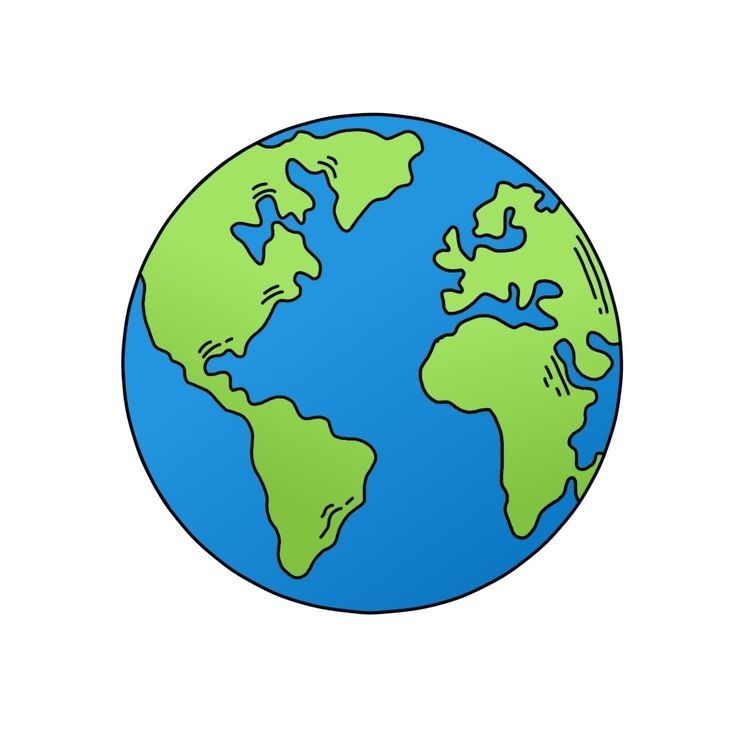

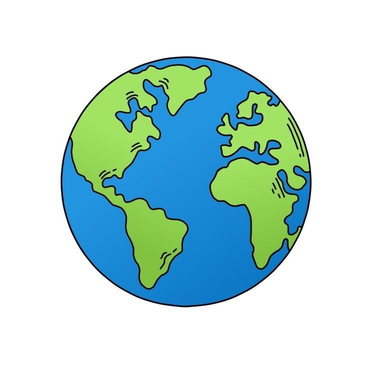

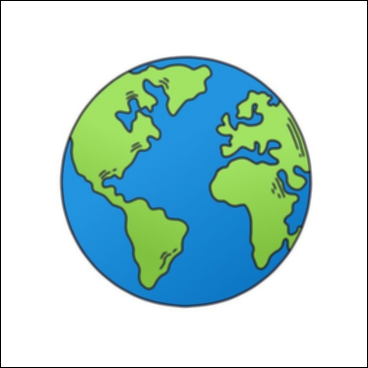

#Bài tập Chương 7

In [ ]:
#Bài tập 1
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/traidat.PNG', cv2.IMREAD_GRAYSCALE)
gauss_kernel = (1/256) * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
blurred = cv2.filter2D(image, -1, gauss_kernel)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Ảnh làm mờ Gaussian')
plt.axis('off')
plt.tight_layout()
plt.show()

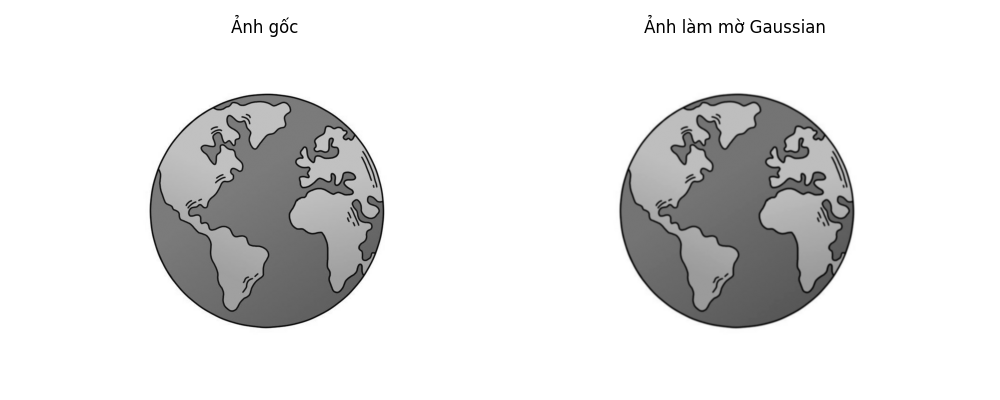

In [ ]:
#Bài tập 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/traidat.PNG', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Không đọc được ảnh, kiểm tra lại đường dẫn")
else:
    kernel_a = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ], dtype=np.float32)
    kernel_b = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ], dtype=np.float32)
    edge_a = cv2.filter2D(image, -1, kernel_a)
    edge_b = cv2.filter2D(image, -1, kernel_b)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Ảnh gốc")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title("Làm nổi biên - kernel a")
    plt.imshow(edge_a, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Làm nổi biên - kernel b")
    plt.imshow(edge_b, cmap='gray')
    plt.tight_layout()
    plt.show()

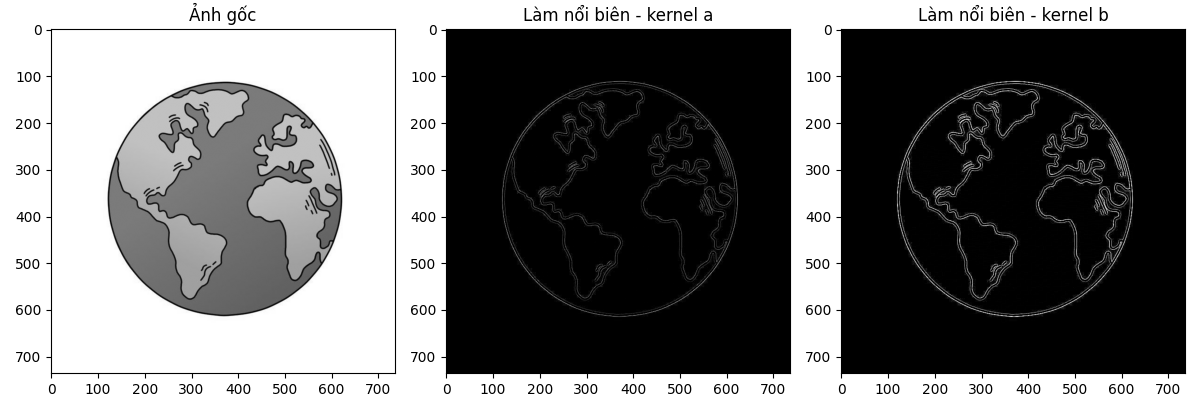